#!Ans!
Coding Example for Frisch Waugh Lovell Theorem

Jonah Heyl and Jonathon Graves

UBC VSE

In [12]:
profits=c(54.46740152, 54.1510822 , 54.80388508, 59.83323573, 53.73423707,50.12406982, 59.21903338, 58.7327607 , 53.51746822, 56.30133113,
53.57826959, 52.12819938, 52.23319223, 54.19563792, 50.72910221,
56.5083907 , 57.55686149, 59.32101226, 53.7640416 , 52.96927283,
53.71944312, 58.27699359, 59.01139535, 54.27303785, 50.02189431,
50.41965245, 51.41787383, 55.98237185, 51.06460522, 52.97158986)

In [13]:
stock_price=c(95.14888652, 68.29787971, 7.61625482, 41.00779428, 4.19013988,
17.41868316, 56.54020056, 17.28911706, 56.66104779, 51.40042529,
86.88708875, 72.03472479, 90.35913471, 27.76149982, 25.66654322,
69.97032629, 90.15688962, 98.36923251, 64.09128124, 33.00073885,
60.66752162, 82.21597886, 62.79650655, 11.79230575, 28.58776734,
98.67472153, 43.18008485, 57.42344138, 52.72420767, 19.76530494)

In [14]:
C=c(-15.14888652, 11.70212029, 72.38374518, 38.99220572,
75.80986012, 63. , 23.45979944, 62.71088294,
23.33895221, 28.59957471, -10.88708875, 7.96527521,
-10.35913471, 52.23850018, 54.33345678, 10.02967371,
-10.15688962, -20.36923251, 15.90871876, 46.99926115,
19.33247838, -2.21597886, 17.20349345, 68.20769425,
51.41223266, -18.67472153, 36.81991515, 22.57655862,
27.27579233, 60.23469506)

First we will try the regression without including the cash on hand of I.O.N.A. holdings

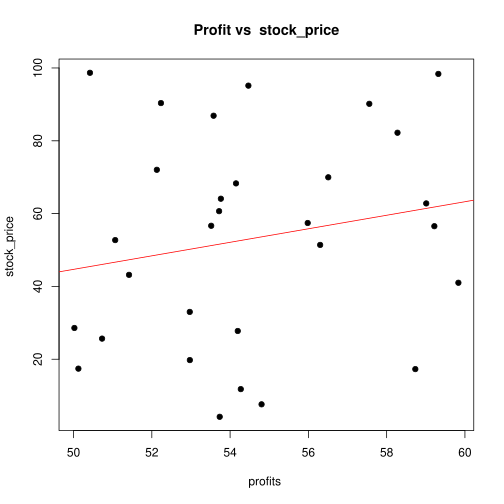

In [17]:
#we can see graphicly that this is not a very good fit
plot(profits,stock_price, main="Profit vs  stock_price", 
   xlab="profits ", ylab="stock_price ", pch=19)
 abline(lm(stock_price~profits), col="red") #this make a reggression line on the plot

In [18]:
model=lm(stock_price~profits) #this runs a linear regression of the stock price on profits for graves inc.

r-sqaured is mesure for goodness of fit, it is the ratio of explained varraince by the model over total varraince in the dependent.

In [19]:
summary(model)  #we can see this has an r-squared of 0.03634, which indicates a bad fit


Call:
lm(formula = stock_price ~ profits)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.442 -21.562   1.488  20.581  53.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -48.192     98.674  -0.488    0.629
profits        1.858      1.808   1.028    0.313

Residual standard error: 28.93 on 28 degrees of freedom
Multiple R-squared:  0.03634,	Adjusted R-squared:  0.001923 
F-statistic: 1.056 on 1 and 28 DF,  p-value: 0.313


Now we will do two reggressions as was done in the notes to fit the following equation,

$$\text{Stock Price}= \beta_0 + \beta_1 \text{Profits} + \beta_2\text{C} +\epsilon_i$$

In [20]:
model1=lm(profits~C)
summary(model1)


Call:
lm(formula = profits ~ C)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9663 -2.4681 -0.7465  1.7976  5.5707 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.02215    0.74007  74.347   <2e-16 ***
C           -0.01948    0.01884  -1.034     0.31    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.968 on 28 degrees of freedom
Multiple R-squared:  0.03678,	Adjusted R-squared:  0.00238 
F-statistic: 1.069 on 1 and 28 DF,  p-value: 0.31


In [21]:
x=data.frame(C,nrow=1)
pp=predict(model1,newdata =x) #this is the expected value of the profits conditional on C
model2=lm(stock_price~pp)
summary(model2) #n


Call:
lm(formula = stock_price ~ pp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4196 -0.0974  0.2006  0.3328  0.6620 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2715.4046    13.5981  -199.7   <2e-16 ***
pp             50.7966     0.2495   203.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7656 on 28 degrees of freedom
Multiple R-squared:  0.9993,	Adjusted R-squared:  0.9993 
F-statistic: 4.145e+04 on 1 and 28 DF,  p-value: < 2.2e-16


Let's think visually about what is happening.

$$\text{Stock Price}= \beta_0 + \beta_1 \text{Profits} + \beta_2\text{C} +\epsilon_i$$

When we exclude C we are essentially are looking at the stock price in a 2 dimensional plane, and excluding part of the relation. By doing two regressions we ask how does Profits relate to C in 2'd this would be the plot below, and then how does the stock price relate to profit in a 2d plane. Essentially we deal with one plot at a time.

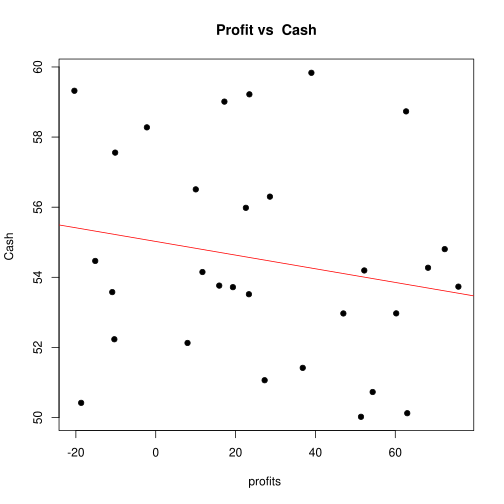

In [22]:
#C and profits 2d plot

    plot(C,profits, main="Profit vs  Cash", 
   xlab="profits ", ylab="Cash ", pch=19)
 abline(lm(profits~C), col="red")



Anyway, we build the total regression is equivalent. We can regress profits on C first or vice versa. 

In [23]:
mod=lm(C~profits) # reggressing C on profits
x=data.frame(profits,nrow=1)
cc=predict(model1,newdata =x) #E[C|profits]
mod2=lm(stock_price~cc) #reggress sock price on  E[C|profits]
summary(mod2)


Call:
lm(formula = stock_price ~ cc)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4196 -0.0974  0.2006  0.3328  0.6620 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2715.4046    13.5981  -199.7   <2e-16 ***
cc             50.7966     0.2495   203.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7656 on 28 degrees of freedom
Multiple R-squared:  0.9993,	Adjusted R-squared:  0.9993 
F-statistic: 4.145e+04 on 1 and 28 DF,  p-value: < 2.2e-16


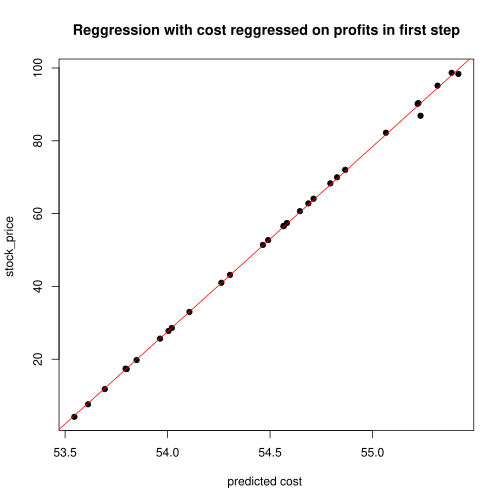

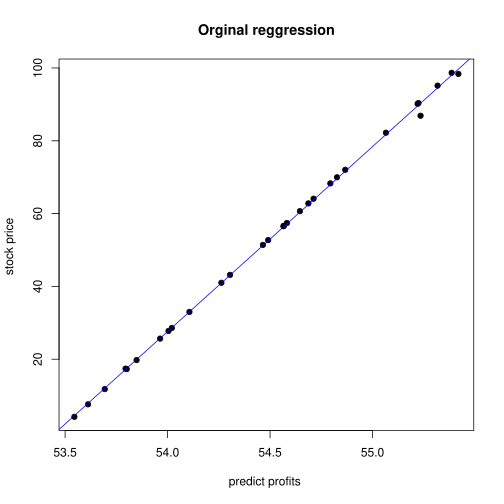

In [24]:
plot(cc,stock_price,main="Reggression with cost reggressed on profits in first step", 
   xlab="predicted cost ", ylab="stock_price ", pch=19)
 abline(mod2, col="red")

plot(pp,stock_price, main="Orginal reggression", 
   xlab="predict profits ", ylab="stock price ", pch=19)
 abline(model2, col="blue") 

#We can see that both predictions are completely identical
